<a href="https://colab.research.google.com/github/shazzad-hasan/practice-deep-learning-with-pytorch/blob/main/mlp_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load and visualize dataset

In [3]:
# import required libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from torchvision import datasets
import torchvision.transforms as transforms
import torchvision.transforms as transforms

transform = transforms.ToTensor()

train_x = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_x = datasets.MNIST(root="data", train=False, download=True, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [7]:
# percentage of training set to use as validation
valid_size = 0.2

# split dataset into train and test datasets 
m = len(train_x) # num of training examples
indices = list(range(m))
np.random.shuffle(indices)
split = int(np.floor(valid_size * m))
train_idx, valid_idx = indices[split:], indices[:split]

In [10]:
from torch.utils.data.sampler import SubsetRandomSampler

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_x, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_x, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_x, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers)

In [14]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

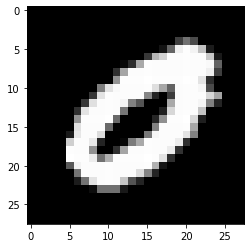

In [19]:
# visualize a training example
img = np.squeeze(images[1])
fig = plt.figure() 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

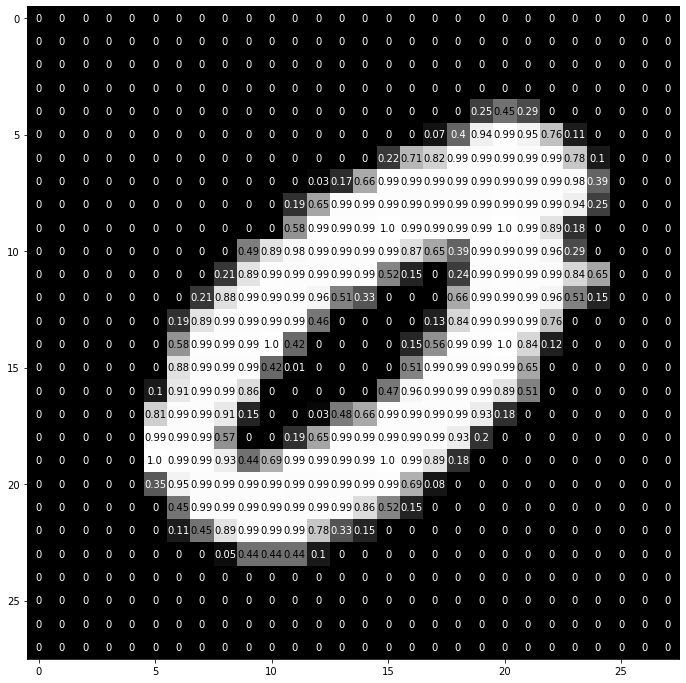

In [21]:
# visualize an example in more detail
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

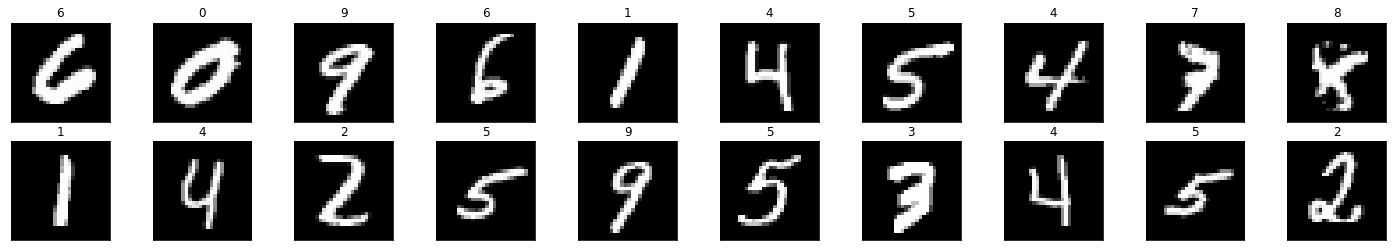

In [26]:
# plot a batch of training images along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for i in np.arange(20):
  ax = fig.add_subplot(2, 20/2, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(images[i]), cmap="gray")
  ax.set_title(str(labels[i].item()))

## Define a neural network

In [28]:
import torch.nn as nn
import torch.nn.functional as F

# define the neural network architecture
class Network(nn.Module):
  def __init__(self):
    super(Network, self).__init__()
    self.fc1 = nn.Linear(28*28, 512) 
    self.fc2 = nn.Linear(512, 512)
    self.fc3 = nn.Linear(512, 10)
    self.dropout = nn.Dropout(0.2)

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = F.relu(self.fc1)
    x = self.dropout(x)
    x = F.relu(self.fc2(x))
    x = self.dropout(x)
    x = self.fc3(x)
    return x
  
model = Network()
print(model)

Network(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [29]:
# specify loss (categorical cross-entropy loss)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

## Train the model

In [ ]:
epochs = 50

# initialize trackers for min validation loss


## Evaluate the performance of the trained model on a test dataset